# Data preprocessing - continued

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataframe_checks import check_column_order, check_time_column, check_col_types, check_missing_values, data_report, plot_time_series

In [25]:
Miguel_path = "C:/Users/User/Desktop/Project_repos/timecave";
raw_path = "timecave/experiments/datasets/raw";

In [26]:
path = f"{Miguel_path}/{raw_path}";

## NY Taxi dataset

In [13]:
taxi_data = pd.read_csv(f"{path}/NYC Taxi Traffic/dataset.csv", index_col=[0], parse_dates=["timestamp"]);

In [14]:
taxi_data

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [15]:
data_report(taxi_data, "timestamp", "30min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [17]:
taxi_data.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

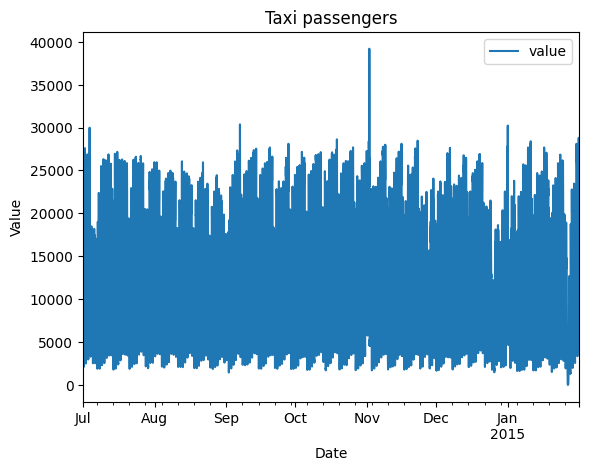

In [21]:
plot_time_series(taxi_data, title="Taxi passengers");

In [23]:
taxi_data.shape

(10320, 2)

In [24]:
taxi_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/taxi_data.csv", index=False);

## Electric Power Consumption

In [30]:
power_consumption_data = pd.read_csv(f"{path}/Electric Power Consumption/powerconsumption.csv", parse_dates=["Datetime"]);

In [31]:
power_consumption_data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [33]:
data_report(power_consumption_data, "Datetime", freq="10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [34]:
power_consumption_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/power_consumption_data.csv", index=False);

## Room Occupancy Detection

In [35]:
room_occupancy_detection = pd.read_csv(f"{path}/Room Occupancy Detection/Occupancy.csv", parse_dates=["date"]);

In [38]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [43]:
room_occupancy_detection["date"] = room_occupancy_detection["date"].dt.round("min");

In [44]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [49]:
room_occupancy_detection = check_time_column(room_occupancy_detection, "date", "min", fix=True);

3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0


In [51]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6
________________________________________________________________


In [54]:
room_occupancy_detection = check_missing_values(room_occupancy_detection, alpha=0.1, fix=True);

Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6


In [55]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


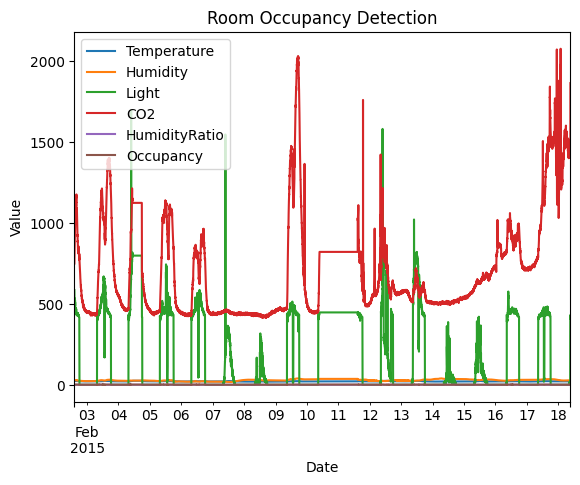

In [56]:
plot_time_series(room_occupancy_detection, legend=True, title="Room Occupancy Detection");

In [57]:
room_occupancy_detection.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/room_occupancy_data.csv", index=False);

## Forest Fires in Brazil

In [191]:
fires_data = pd.read_csv(f"{path}/Forest Fires in Brazil/amazon.csv", encoding="ISO-8859-1", parse_dates=["date"]);

In [192]:
fires_data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [193]:
fires_data.groupby("state")[["number"]].count()

,number
state,
Acre,239
Alagoas,240
Amapa,239
Amazonas,239
Bahia,239
Ceara,239
Distrito Federal,239
Espirito Santo,239
Goias,239


In [194]:
fires_data = fires_data.loc[fires_data["state"].isin(["Rio"])].copy();

In [195]:
meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"];
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"];

In [196]:
fires_data = fires_data.replace(to_replace=meses, value=months);

In [197]:
fires_data["Date"] = fires_data["month"] + "-" + fires_data["year"].astype(str);

In [198]:
fires_data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [199]:
fires_data["Date"] = pd.to_datetime(fires_data["Date"], format="%B-%Y");

In [202]:
fires_data

,year,state,month,number,date,Date
4303,1998,Rio,January,0.0,1998-01-01,1998-01-01
4304,1999,Rio,January,0.0,1999-01-01,1999-01-01
4305,2000,Rio,January,0.0,2000-01-01,2000-01-01
4306,2001,Rio,January,0.0,2001-01-01,2001-01-01
4307,2002,Rio,January,0.0,2002-01-01,2002-01-01
...,...,...,...,...,...,...
5015,2012,Rio,December,38.0,2012-01-01,2012-12-01
5016,2013,Rio,December,62.0,2013-01-01,2013-12-01
5017,2014,Rio,December,31.0,2014-01-01,2014-12-01
5018,2015,Rio,December,42.0,2015-01-01,2015-12-01


In [203]:
fires_data = fires_data.reset_index().drop(columns=["month", "state", "year", "index", "date"]);

In [204]:
fires_data

,number,Date
0,0.0,1998-01-01
1,0.0,1999-01-01
2,0.0,2000-01-01
3,0.0,2001-01-01
4,0.0,2002-01-01
...,...,...
712,38.0,2012-12-01
713,62.0,2013-12-01
714,31.0,2014-12-01
715,42.0,2015-12-01


In [207]:
data_report(fires_data, "Date", "MS")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. FAILED: First column is not time column!
First column type is not datetime-like
Column 'Date' type is not float or int: datetime64[ns]
2. Total 2 columns have wrong types.
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478
5. Number of Time Series with missing values : 0
________________________________________________________________


In [212]:
fires_data.dtypes

number           float64
Date      datetime64[ns]
dtype: object

In [213]:
check_column_order(fires_data, "Date")

1. FAILED: First column is not time column!


In [215]:
number = fires_data["number"].copy();

In [217]:
date = fires_data["Date"].copy();

In [222]:
new_fires_data = pd.concat([date, number], axis=1);

In [225]:
fires_data["Date"].unique().shape[0]

239

In [224]:
data_report(new_fires_data, "Date", "MS");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478
5. Number of Time Series with missing values : 0
________________________________________________________________


In [228]:
new_fires_data = check_time_column(new_fires_data, "Date", "MS", fix=True);

3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478


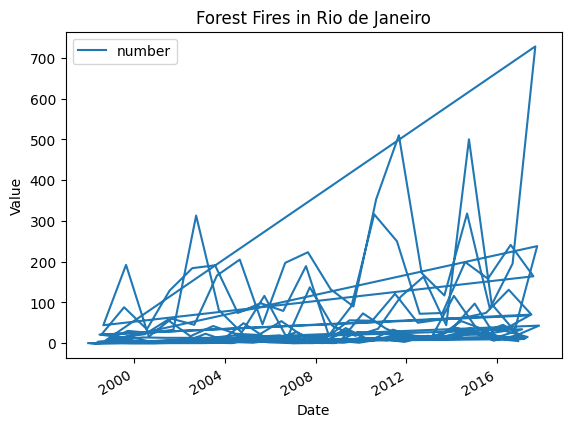

In [230]:
plot_time_series(new_fires_data, legend=True, title="Forest Fires in Rio de Janeiro");

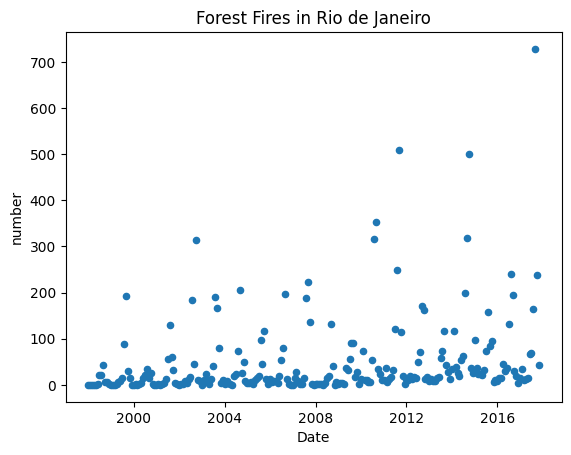

In [232]:
new_fires_data.plot(kind="scatter", x="Date", y="number", title="Forest Fires in Rio de Janeiro");

In [233]:
new_fires_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/forest_fires_Rio_Janeiro.csv", index=False);

## Energy Generation Time Series

In [160]:
energy_gen_data = pd.read_csv(f"{path}/Electricity Generation Time Series/electricity_data.csv", parse_dates=[0]);

In [162]:
energy_gen_data.dtypes

Unnamed: 0                                     datetime64[ns]
United States : all sectors                             int64
United States : electric utility                        int64
United States : independent power producers             int64
United States : all commercial                          int64
                                                    ...      
Hawaii : all sectors                                    int64
Hawaii : electric utility                               int64
Hawaii : independent power producers                    int64
Hawaii : all commercial                                object
Hawaii : all industrial                                 int64
Length: 311, dtype: object

In [163]:
energy_gen_data = energy_gen_data.rename(columns={"Unnamed: 0": "Date"});

In [164]:
cols = ["Date", "Alaska : all sectors", "California : electric utility", "Massachusetts : independent power producers", "Texas : all commercial", "Florida : all industrial"];

In [166]:
energy_gen_data = energy_gen_data[cols];

In [173]:
data_report(energy_gen_data, "Date", "MS");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


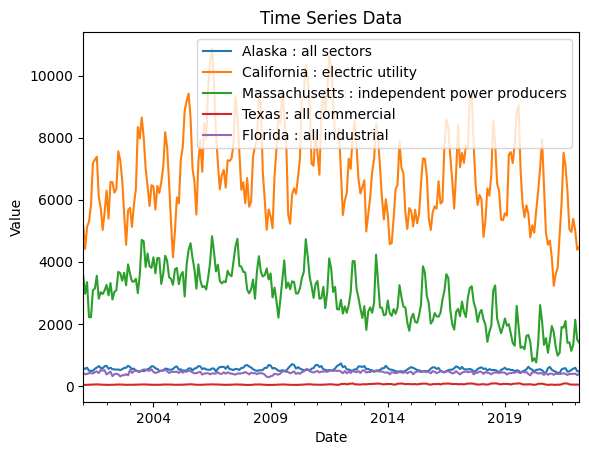

In [176]:
plot_time_series(energy_gen_data);

In [177]:
energy_gen_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/US_energy_generation_data.csv", index=False);

## Next ...